In [ ]:
from __future__ import print_function
import glob
import numpy as np
import pylab as pl
import sys
import os
import pickle as pkl
from scipy.ndimage.filters import median_filter

#from gatspy.periodic import LombScargleFast
from findImageSize import findsize
import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%matplotlib nbagg
%pylab inline

REREAD=False
REREAD=True
DETREND=0
nmax=100
lmax = 0

In [106]:
impath = os.getenv("UIdata")+"/DeLeonLabTest1/load1*" 
img = glob.glob(impath+"*0000.raw")[0]
img

'/Users/fbianco/UIdata//DeLeonLabTest1/load1_2016-08-24-104855-0000.raw'

In [107]:
nrow, ncol = 1530, 2444
#= findsize(img)

In [108]:
nband = 3
print (nrow, ncol)

1530 2444


In [109]:
print (impath)
flist=glob.glob(impath+"*0???.raw")
print(len(flist))
flist11975=np.array(flist)[np.argsort(flist)]
#print (flist11975)

/Users/fbianco/UIdata//DeLeonLabTest1/load1*
445


1024 4896.0
1088 4608.0
1152 4352.0
1224 4096.0
1536 3264.0
1632 3072.0
2048 2448.0
2176 2304.0
2304 2176.0
2448 2048.0
3072 1632.0
3264 1536.0
4096 1224.0
4352 1152.0
4608 1088.0
4896 1024.0


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


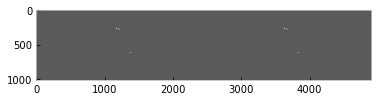

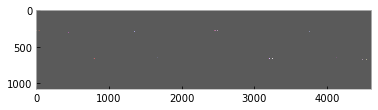

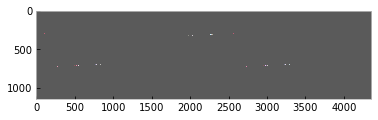

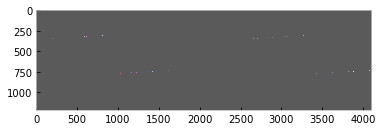

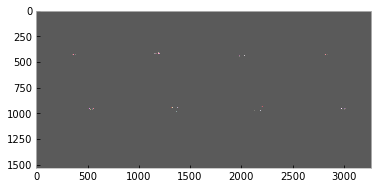

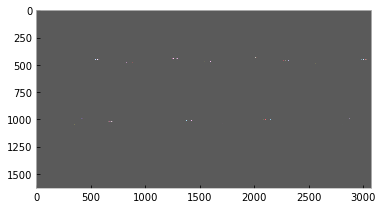

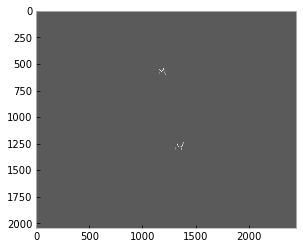

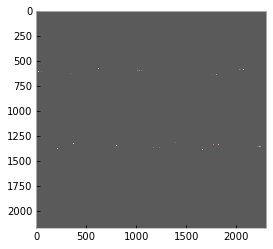

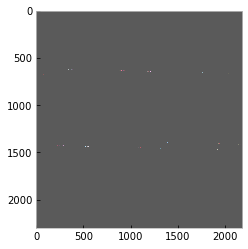

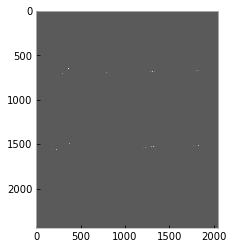

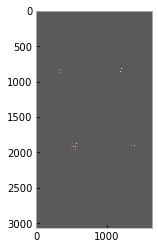

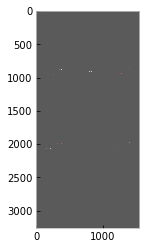

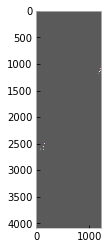

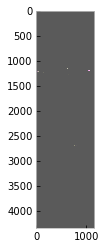

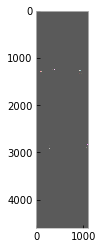

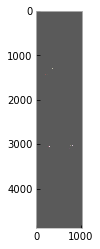

In [110]:
nband = 3
#f0 = np.fromfile(flist[100],dtype=np.uint8)
f0 = (median_filter(255*pow((1.0/255.0*np.fromfile(flist[100], dtype=np.uint8)),1.0/3), 
                                 footprint=(12*(i+1),12*(i+1),0))).clip(90,255).astype(np.uint8)
                  
n0 = (len(f0)/3)
for i in range(1000, int(n0)):
    nrow = i
    if len(f0) % (i*3) == 0:
        ncol = len(f0)/3/i
        if ncol<1000 : break
        print (nrow, ncol)
        pl.figure()
        pl.imshow(f0.reshape(nrow,ncol,nband))
    #

In [111]:
def plotwindows(x1,y1,x2,y2, imfile, axs=None, c='w', plotimg=0):
    if axs == None:
        fig, axs = pl.subplots(1,1,figsize=(15,15))
    #pl.imshow(np.fromfile(flist[0],dtype=np.uint8).reshape(nrow,ncol,nband))
    #pl.imshow(np.fromfile(flist[0],dtype=np.uint8).reshape(nrow,ncol,nband)[x1:x2,y1:y2])
    #pl.figure()
    #axs.imshow(np.fromfile(flist[0],dtype=np.uint8).reshape(nrow,ncol,nband)[y1:y2,x1:x2],  interpolation='none')
    if plotimg == 0:
        axs.imshow(np.fromfile(imfile,dtype=np.uint8).reshape(nrow,ncol,nband),  interpolation='none')
        axs.set_xlim(0, axs.get_xlim()[1])
        axs.set_ylim(axs.get_ylim()[0], 0)
    axs.plot([x1,x2],[y1,y1], '-', color='%s'%c)    
    axs.plot([x2,x2],[y1,y2], '-', color='%s'%c)    
    axs.plot([x1,x2],[y2,y2], '-', color='%s'%c)    
    axs.plot([x1,x1],[y2,y1], '-', color='%s'%c)    
    #pl.show()
    

In [112]:
def read_to_lc(x1,y1,x2,y2, flist, fname, c='w', 
               showme=False, verbose = False):
    if showme :
        plotwindows(x1,y1,x2,y2, flist[0], c=c)
    if REREAD: 
        a=np.zeros(len(flist[:nmax]))
        for i,f in enumerate(flist[:nmax]):
            #print (f)
            try: a[i] = (np.fromfile(f,
                                     dtype=np.uint8).reshape(nrow,
                                                               ncol,
                                                               nband)\
                         [y1:y2,x1:x2].sum())
            except: 
                a[i]=float('NaN')
                continue
        
    else:
        a=pkl.load(open(fname+".pkl",'rb'))
    f0 = ((np.fromfile(flist[0],
                       dtype=np.uint8).reshape(nrow, 
                                               ncol,
                                               nband)[y1:y2,x1:x2]))
    area = (x2-x1)*(y2-y1)
    if verbose:
        print ('mean: {0:.2f}, stdev: {1:.2f}, area: {2:d} pixels, ' + 
               '{3:d} images, average flux/pixel: {4:.1f}'.format(
                    np.nanmean(a), np.nanstd(a), area, len(a), 
                np.nanmean(a)/float(area)))
    R = float(f0[:,:,0].sum())
    G = float(f0[:,:,1].sum())
    B = float(f0[:,:,2].sum())
    mx = np.argmax([R,G,B])
    colors= ['Red','Yellow','Blue']
    if verbose:
        print (colors[mx], ': R: {0:.2f} G: {1:.2f} B: {2:.2f}'.\
               format(1, G/R, B/R))
    if REREAD: pkl.dump(a,open(fname+".pkl","wb"))
    return (a)


In [113]:

font = {'size'   : 23}
def get_plot_lca (x1, y1, x2, y2, flist, fname, c='w', verbose=True):
    a= read_to_lc(x1, y1, x2, y2, flist, fname, showme=False, c=c, verbose=verbose)
    flux0=(a-np.nanmean(a))/np.nanstd(a)
    flux=flux0.copy()
    
    if verbose:
        pl.rc('font', **font)

        pl.figure(figsize=(15,5))
        pl.plot(flux, color=c)
        pl.xlabel("img number")
        pl.ylabel("standardized flux")
        pl.title("119.75hz shutter 4Hz camera sampling")
        pl.xlim(0,200)

    return flux0

In [121]:
allights = [[550,650,1150,1250], [1250,1350,1300,1400]]
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]
lmax = len(allights)

In [122]:
def sparklines(data, lab, ax, x=None):
    if x==None :#and len(x)==0:
        x=np.arange(len(data)) 
    ax.plot(x, data, 'k', alpha=0.3)
    ax.axis('off')
    ax.set_xlim(-(x.max()-x.min())*0.1, (x.max()-x.min())*1.1)
    try:
        ax.plot(x[np.where(data == max(data))[0]], max(data), 'o', ms=15)
    except ValueError:
        try:
            ax.plot(x[np.where(data == max(data))[0][0]], max(data), 
                    'o', ms=15)
        except IndexError: pass
    try:
        ax.plot(x[np.where(data == min(data))[0]], min(data), 'o', ms=15)
    except ValueError:
        try:
            ax.plot(x[np.where(data == min(data))[0][0]], min(data), 
                    'o', ms=15)
        except IndexError: pass
    ax.set_ylim(ax.get_ylim()[0]-(ax.get_ylim()[1]-ax.get_ylim()[0])/10, 
                
                ax.get_ylim()[1])
    ax.text(1., 0.5, "%.1f"%(min(data)), fontsize = 25, 
           transform = ax.transAxes, color='IndianRed')
    ax.text(1.1, 0.5, "%.1f"%(max(data)), fontsize = 25, 
               transform = ax.transAxes, color='SteelBlue')
    ax.text(-0.1, 0.95, lab, fontsize = 25, 
               transform = ax.transAxes)
    if title:
        ax.plot((0,ax.get_xlim()[1]), 
           (ax.get_ylim()[1], ax.get_ylim()[1]), 'k-',)



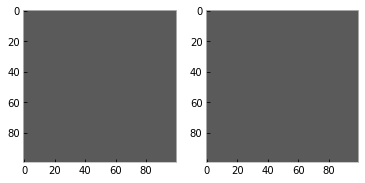

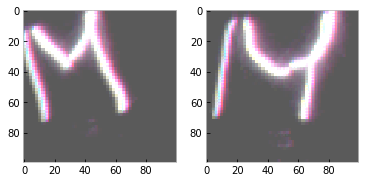

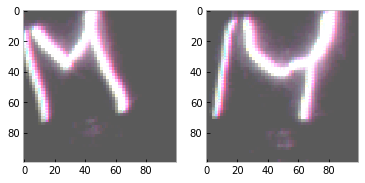

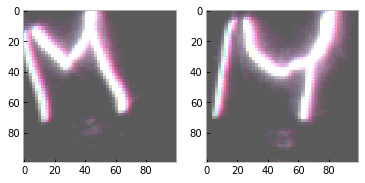

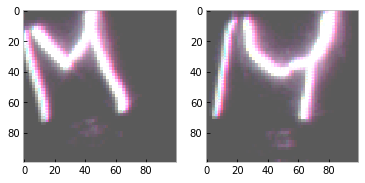

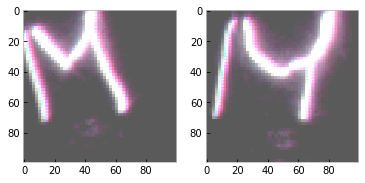

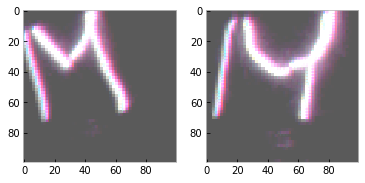

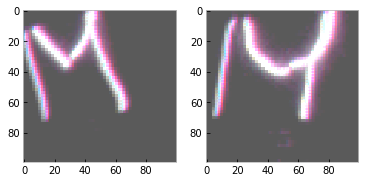

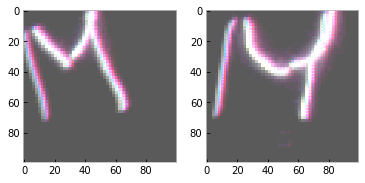

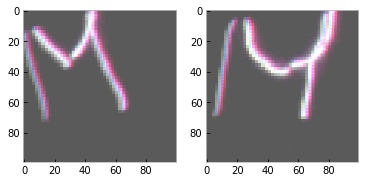

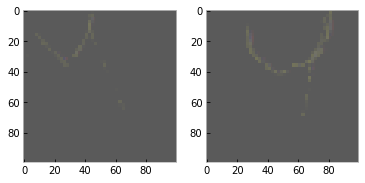

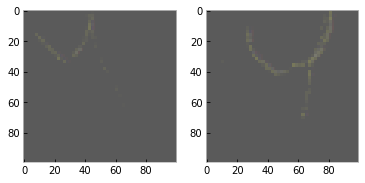

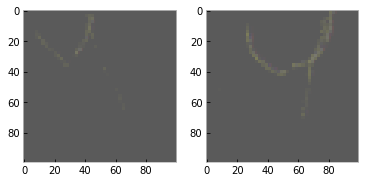

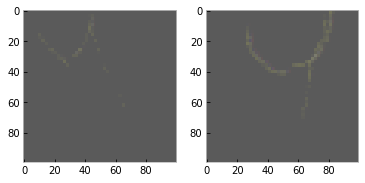

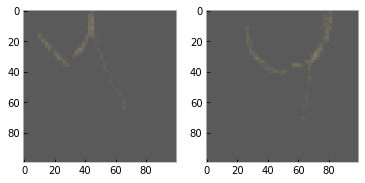

In [135]:
m1=allights[0]
m2=allights[1]
fname = flist[0]
nrow, ncol = 2048, 2448
for i in range(0, len(flist), 31):
    f0 = (median_filter(255*pow((1.0/255.0*np.fromfile(flist[i], 
                                                   dtype=np.uint8)),
                            1.0/3), 
                                 footprint=(12*(i+1),12*(i+1),0))).\
    clip(90,255).astype(np.uint8)
    #print(f0.shape, m)                  
    #n0 = (len(f0)/3)

    fig = pl.figure()
    ax = fig.add_subplot(121)
    ax.imshow(f0.reshape(nrow,ncol,nband)[m1[0]:m1[1],m1[2]:m1[3],:])
    ax = fig.add_subplot(122)
    ax.imshow(f0.reshape(nrow,ncol,nband)[m2[0]:m2[1],m2[2]:m2[3],:])


0 [550, 650, 1150, 1250]
1 [1250, 1350, 1300, 1400]


Text(0.2,1.2,'400 seconds                     min       max')

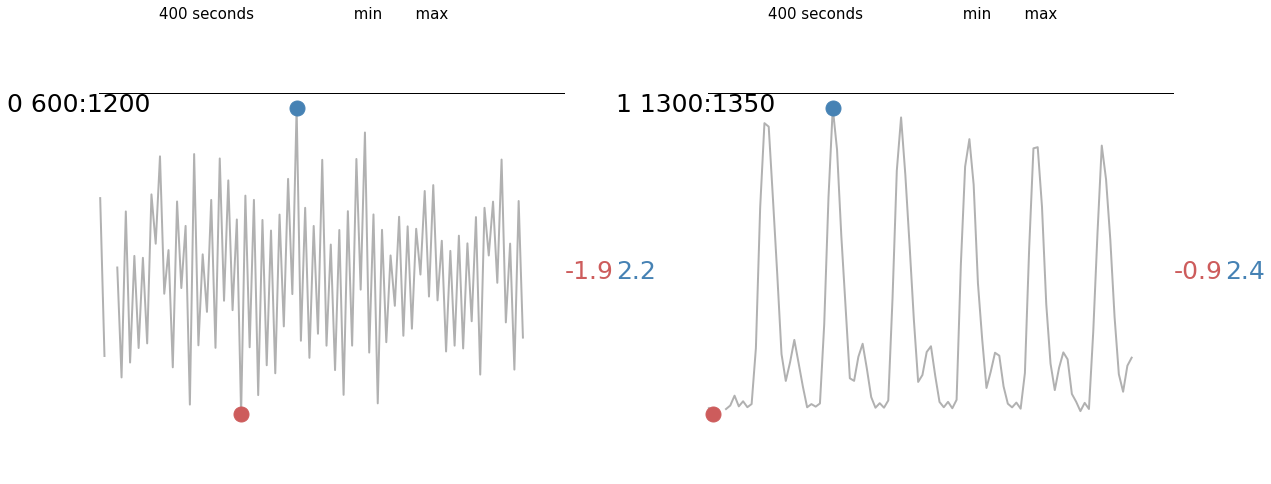

In [134]:
fig = pl.figure(figsize = (20,15))
ax = []
bs = np.zeros((lmax, nmax))
badindx = []
for i,cc in enumerate(allights[:lmax]):
    print (i, cc)
    x2 = 0 if i%2 == 0 else 2
    #ax.append(pl.subplot2grid((25,3), ((i/2)+1, x2+1)))
    ax.append(fig.add_subplot(lmax/2+1,2,i+1))
    #if False:    
    bs[i] = get_plot_lca (int(cc[0]), int(cc[2]), 
                                       int(cc[1]), int(cc[3]),
                                           flist11975, 
                    fname+'_x%d_y%d'%(int(cc[0]), int(cc[1])), 
                          verbose=False)
    
    #pl.plot(b1)
    sparklines(bs[i], '%d %d:%d'%(i, 0.5 * (int(cc[1])+int(cc[0])), 
                                  0.5 * (int(cc[2]) + int(cc[3]))), 
               ax[i])
    
    sample_rate = 0.25

    
    #ax[i].plot(np.arange(0, n*sample_rate, sample_rate), b1, 'IndianRed')
    #ax[i].set_xlabel("seconds")
    #ax[i].set_ylabel("standardized flux")
    #pl.title("ESB 11975hz shutter 4Hz camera sampling")

ax[0].text (0.2, 1.2, 
            '{0:1d} seconds                     '.format(len(bs[0])*4) + 
            '{0:2s}       {1:2s}'.format('min','max'), 
            transform = ax[0].transAxes, fontsize=15)


ax[1].text (0.2, 1.2, 
            '{0:1d} seconds                     '.format(len(bs[0])*4) + 
            '{0:1s}       {1:2s}'.format('min','max'), 
            transform = ax[1].transAxes, fontsize=15)

In [ ]:
sinelights = [[783,1095,2], [693,1099,1], [693,1123,3],[780,1127,4],[1233,1099,5],
 [1280,1135,7],[1280,1083,8],[46,1115,20],[559,1001,49],[515,1269,51],[429,1182,53],
              [791,870,54],[984,579,58],
 [921,248,59],[1414,957,70],[1414,981,76],[1481,957,77],[1883,508,105],[2080,1269,121]]

In [ ]:
 

from images2gif import writeGif
from PIL import Image, ImageSequence
#import Image
import IPython.display as IPdisplay

def callplotw(xc, yc, i, fname = None, len=40):
    fig = pl.figure(figsize=(20,20))
    ax1 = fig.add_subplot(121)
    plotwindows(xc-25, yc-25, xc+25, yc+25, flist11975[10], axs=ax1, c='w', plotimg = 0)
    ax2 = fig.add_subplot(122)
    
    plotwindows(xc-25, yc-25, xc+25, yc+25, flist11975[nmax-10], axs=ax2, c='w', plotimg = 0)
    if fname: 
        images = [Image.fromarray(np.fromfile(f,
                              dtype=np.uint8).reshape(nrow,
                                                      ncol, nband)[yc-20:yc+22,
                                                                   xc-20:xc+22]) \
                  for f in flist11975[:len]]
        #print (images, fname)
        writeGif(fname + "_%04d_%04d"%(xc,yc)+".GIF", images, duration=0.01)
        
    fig = pl.figure(figsize=(20,2))
    ax3 = fig.add_subplot(121)
    ax3.plot(bs[i], label = "time series")
    ax3.legend()

    ax4 = fig.add_subplot(122)
    ax4.plot(np.fft.rfftfreq(nmax, d=sample_rate)[2:], np.abs(np.fft.rfft(bs[i]))[2:], 
             label = "fft")
    ax4.plot([0.23, 0.23], [ax4.get_ylim()[0], ax4.get_ylim()[1]])
    ax4.legend()

In [ ]:
fnameroot = 'ESB_119.75_camera4_100ms'
callplotw(783, 1095, 0, fname = fnameroot, len=100)
print (fnameroot + "_%d_%d"%(783, 1095)+".GIF")
IPdisplay.Image(url=fnameroot + "_%04d_%04d"%(783, 1095)+".GIF")

In [ ]:
def makeGifLcPlot(x,y,ind,fnameroot): 
    callplotw(x, y, ind, fname = fnameroot, len=160)
    print (fnameroot + "_%d_%d"%(x,y)+".GIF")
    IPdisplay.Image(url=fnameroot + "_%04d_%04d"%(x,y)+".GIF")
    
for coords in sinelights:
    makeGifLcPlot(coords[0],coords[1],coords[2],fnameroot)

In [ ]:
x,y = 791, 870
callplotw(x, y, 54, fname = fnameroot, len=100)
print (fnameroot + "_%d_%d"%(x,y)+".GIF")
IPdisplay.Image(url=fnameroot + "_%04d_%04d"%(x,y)+".GIF")

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
badindx = []
for i,bsi in enumerate(bs):
    if np.isnan(bsi).any():
        
        badindx.append(i)
bsnew = np.delete(bs, badindx, 0)

In [ ]:
alllightsnew = np.delete(allights[:lmax],  badindx, 0)

In [ ]:
bs = bsnew
fig = pl.figure(figsize = (20,300))
ax = []


pca = PCA()
X_pca = pca.fit_transform(bs)
pca.fit(bs)

evals = pca.explained_variance_ratio_
print (evals.cumsum())
evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
#evals = data['evals'] ** 2
#evals_cs = evals.cumsum()
#evals_cs /= evals_cs[-1]
#evecs=data['evecs']

evecs = pca.components_

for i,Xc in enumerate(evecs):
    if evals_cs[i] > 91:
        break
    x2 = 0 if i%2 == 0 else 2
    #ax.append(pl.subplot2grid((25,3), ((i/2)+1, x2+1)))
    ax.append(fig.add_subplot(lmax/2+1,2,i+1))
    #if False:    
    #pl.plot(b1)
    sparklines(Xc, "%.3f"%evals_cs[i], ax[i])
    
    #sample_rate = 0.25

    #ax[i].plot(np.arange(0, n*sample_rate, sample_rate), b1, 'IndianRed')
    #ax[i].set_xlabel("seconds")
    #ax[i].set_ylabel("standardized flux")
    #pl.title("ESB 11975hz shutter 4Hz camera sampling")



In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)


vals = ((bs.T - bs.mean(1))/bs.std(1)).T

km.fit(vals)
km.cluster_centers_
km.labels_
fig = pl.figure(figsize=(20,100))
ax = []
freq = np.fft.rfftfreq(nmax, d=sample_rate)
for i,Xc in enumerate(km.cluster_centers_):
    ax.append(fig.add_subplot(20,2,(i*2+1)))
    #if False:    
    #pl.plot(b1)
    sparklines(Xc, "%i"%(i), ax[-1])
    ax.append(fig.add_subplot(20,2,(i*2+2)))
    fft = np.abs(np.fft.rfft(Xc))[1:]
    fft[0]=-3
    sparklines(fft, "%i"%(i), ax[-1], x=freq[1:])
    ax[-1].plot([0.25,0.25],[fft.min(),fft.max()],'k-')
    ax[-1].text(0.8,0.8,"cluster %i"%i,color=kelly_colors_hex[i], transform=ax[-1].transAxes)
    #ax[i].plot(freq, np.abs(np.fft.rfft(Xc)), alpha=0.5, color='IndianRed')
ax[-1].axis("on")
km.labels_


In [ ]:

font = {'size'   : 23}
pl.rc('font', **font)
allights2=allights
for i in badindx:
    allights2=np.delete(allights, i, 0)
for i in badindx:
    allights2=np.delete(allights, i, 0)
fig = figure(figsize=(15,15))
axs = fig.add_subplot(111)
#import matplotlib.image as mpimg
#img=mpimg.imread('ESBstack.png')
#img = np.sum(np.array([np.fromfile(flist11975[i],dtype=np.uint8).reshape(nrow,ncol,nband) for i in range(1)]), axis=0)
img = np.fromfile(flist11975[0],dtype=np.uint8).reshape(nrow,ncol,nband)
print (img.shape)
axs.imshow(img,  interpolation='none')
axs.set_xlim(0, axs.get_xlim()[1])
axs.set_ylim(axs.get_ylim()[0], 0)
fig2 = figure(figsize=(15,15))
axs2 = fig2.add_subplot(111)

for i,cc in enumerate(allights2[:lmax-len(badindx)]):
    x1,x2=int(cc[0])-13,int(cc[0])+14
    y1,y2=int(cc[1])-13, int(cc[1])+14
    axs.plot([x1,x2],[y1,y1], '-', color='%s'%kelly_colors_hex[km.labels_[i]])    
    axs.plot([x2,x2],[y1,y2], '-', color='%s'%kelly_colors_hex[km.labels_[i]])    
    axs.plot([x1,x2],[y2,y2], '-', color='%s'%kelly_colors_hex[km.labels_[i]])    
    axs.plot([x1,x1],[y2,y1], '-', color='%s'%kelly_colors_hex[km.labels_[i]])  
    R = sum(img[y1:y2,x1:x2,0].astype(float))
    G = sum(img[y1:y2,x1:x2,1].astype(float))
    B = sum(img[y1:y2,x1:x2,2].astype(float))
    norm = max([R,G,B])
    axs.plot(int(cc[0]),int(cc[1]), 'o', color=(R/norm, G/norm, B/norm))    
    
    #print (km.labels_[i], '{0:.2f} {1:.2f} {2:.2f}'.format(R/norm, G/norm, B/norm))
    axs2.scatter(km.labels_[i], sum(img[y1:y2,x1:x2,:]), s=60, 
                 color = (R/norm, G/norm, B/norm), alpha=0.8)  
axs2.set_xlim(-0.5,9.5)
axs2.set_xlabel("K-means cluster")
axs2.set_ylabel("brightness")
axs2.set_title("color : light RGB")

In [ ]:
for i in badindx:
    allights2=np.delete(allights, i, 0)
for i in badindx:
    allights2=np.delete(allights, i, 0)
fig=figure(figsize=(15,15))
axs = fig.add_subplot(111)
axs.imshow(np.fromfile(flist11975[0],dtype=np.uint8).reshape(nrow,ncol,nband),  interpolation='none')

for i,cc in enumerate(allights2[:lmax-len(badindx)]):
    x1,x2=int(cc[0])-13,int(cc[0])+14
    y1,y2=int(cc[1])-13, int(cc[1])+14
    axs.plot([x1,x2],[y1,y1], '-', color='%s'%kelly_colors_hex[km.labels_[i]])    
    axs.plot([x2,x2],[y1,y2], '-', color='%s'%kelly_colors_hex[km.labels_[i]])    
    axs.plot([x1,x2],[y2,y2], '-', color='%s'%kelly_colors_hex[km.labels_[i]])    
    axs.plot([x1,x1],[y2,y1], '-', color='%s'%kelly_colors_hex[km.labels_[i]])    


In [ ]:
phi0 = 0
wfreq = 0.22
import scipy.optimize

wave = lambda t, phi: np.sin(2.*wfreq*np.pi*t+phi)
resd = lambda phi, x, t: np.sum((wave(t*0.25, phi) - x)**2)
ntot = 0
for i in [1,2,3,4,7]: 
    ntot += sum(km.labels_ == i)

fig = pl.figure(figsize=(20,200))
j = 0
phases = np.zeros((4,len(bs)))*float('NaN')
for i,Xc in enumerate(bs):
    if km.labels_[i] in [1,2,3,4,7]:
        j = j+1
        ax.append(fig.add_subplot(ntot+1,1,(j+1)))
        fits = scipy.optimize.minimize(resd, phi0, 
                                       args=((Xc-Xc.mean())/Xc.std(), np.arange(len(Xc))))
        #print ( fits )
        phases[0][i] = fits.x%(2*np.pi)
        phases[1][i] = km.labels_[i]
        phases[2][i] = alllightsnew[i][0]
        phases[3][i] = alllightsnew[i][1]
        ax[-1].plot(np.arange(len(Xc))*0.25,(Xc-Xc.mean())/Xc.std())
        ax[-1].plot(np.arange(len(Xc))*0.25,wave(np.arange(len(Xc))*0.25, phases[0][i]))
        ax[-1].set_xlabel("seconds")

In [ ]:
phases[0]

In [ ]:
ax = pl.figure().add_subplot(111)
for i in set(phases[1][~np.isnan(phases[0])]):
    print (i)
    pl.plot(i, np.mean(phases[0][phases[1]==i]/np.pi), 
            'o', ms=sum(phases[1]==i)*5, alpha=0.3)
pl.plot(phases[1], phases[0]/np.pi, 'o')
ax.set_xlim(-0.5,9.5)
ax.set_xlabel("K-means cluster")
ax.set_ylabel(r"phase ($\pi$)")

ax = pl.figure().add_subplot(111)
cmap =  pl.cm.rainbow(phases[0][~np.isnan(phases[0])])
print (len(cmap), len(phases[0][~np.isnan(phases[0])]), cmap)

#cmap = cm.rainbow
#cs1 = [colors[i] for i in range(len(phases[0]))] 
#for p in range(len(phases[0])):
#    pl.scatter(phases[2][p], phases[3][p], color = cmap(len(phases[0]) / float(phases[0][p])))
pl.scatter(phases[2][~np.isnan(phases[0])], phases[3][~np.isnan(phases[0])], color = cmap)
ax.get_axes().set_aspect('equal', 'datalim')
ax.axis('off')